In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [31]:
cancer = load_breast_cancer()

In [32]:
x_tr, x_te, y_tr, y_te = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=10)

In [33]:
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)


(426, 30)
(143, 30)
(426,)
(143,)


In [34]:
tree = DecisionTreeClassifier(max_depth = 5,random_state=77)

In [35]:
tree.fit(x_tr,y_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=77, splitter='best')

In [36]:
tree.score(x_tr,y_tr)

0.9929577464788732

In [37]:
tree.score(x_te,y_te)

0.965034965034965

In [38]:
from sklearn.tree import export_graphviz

In [39]:
export_graphviz(tree, out_file="tree.dot", class_names=["악성","양성"], feature_names=cancer.feature_names, impurity=False, filled=True)

In [40]:
import graphviz

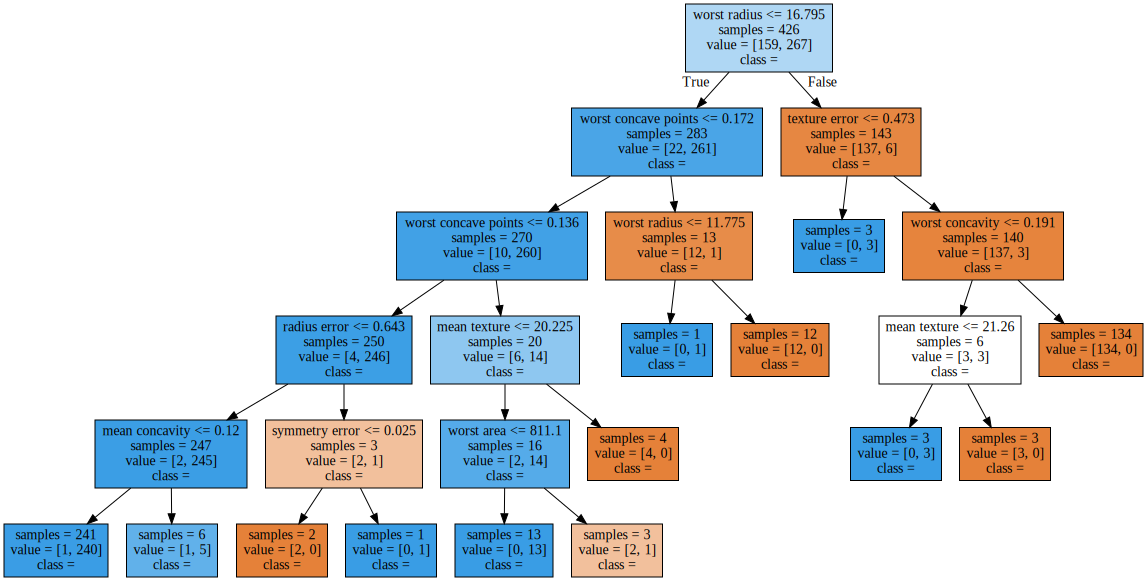

In [41]:
with open("tree.dot" , encoding='UTF8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [42]:
tree.feature_importances_

array([0.        , 0.04065498, 0.        , 0.        , 0.        ,
       0.        , 0.00159143, 0.        , 0.        , 0.        ,
       0.01323116, 0.02894776, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0068616 , 0.        ,
       0.76719544, 0.        , 0.        , 0.0111501 , 0.        ,
       0.        , 0.01477694, 0.11559059, 0.        , 0.        ])

In [43]:
from matplotlib import pyplot as plt
import numpy as np

(-1, 30)

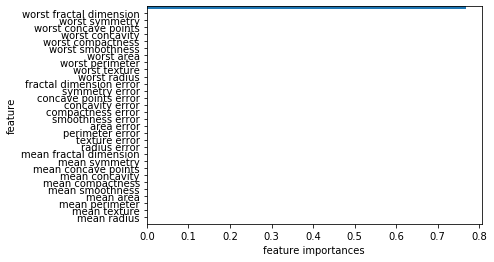

In [46]:
n_features = cancer.data.shape[1]
plt.barh(np.array(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("feature importances")
plt.ylabel("feature")
plt.ylim(-1,n_features)